In [0]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorboardcolab
import pandas as pd

Using TensorFlow backend.


In [0]:
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cancer_dataset.csv
cancer_df = pd.read_csv('cancer_dataset.csv')

--2019-08-23 02:05:02--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cancer_dataset.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.60.49
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.60.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2958 (2.9K) [text/csv]
Saving to: ‘cancer_dataset.csv.1’

cancer_dataset.csv. 100%[===================>]   2.89K  --.-KB/s    in 0s      

2019-08-23 02:05:02 (101 MB/s) - ‘cancer_dataset.csv.1’ saved [2958/2958]



In [0]:
cancer_df.describe()

,age,tumor_size,label
count,100.000000,100.000000,100.00
mean,4.218584,4.463655,0.45
std,1.949688,2.264897,0.50
min,0.494542,0.656397,0.00
25%,2.750747,2.832193,0.00
50%,3.849528,3.766226,0.00
75%,5.405780,5.921538,1.00
max,9.670666,11.170589,1.00


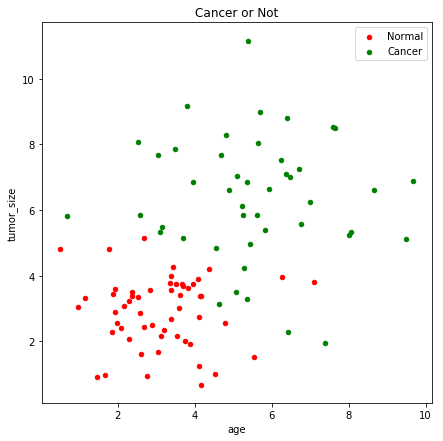

In [0]:
fig = plt.figure(figsize = (7,7))
ax = fig.add_subplot(1,1,1)

#0 : 정상
cancer_df[cancer_df.label == 0].plot('age', 'tumor_size', ax = ax, legend = True, kind = 'scatter', color = 'red')
cancer_df[cancer_df.label == 1].plot('age', 'tumor_size', ax = ax, legend = True, kind = 'scatter', color = 'green')

plt.legend(["Normal", "Cancer"])
plt.title("Cancer or Not")
plt.show()


In [0]:
cancer_df = (cancer_df - cancer_df.min())/(cancer_df.max() - cancer_df.min())

x1s = cancer_df['tumor_size']
x2s = cancer_df['age']
ys = cancer_df['label']
print(x1s)
print(x2s)
print(ys)
#print(cancer_df)

0     0.231241
1     0.435737
2     0.494062
3     0.344485
4     0.271252
5     0.154684
6     0.210313
7     0.570240
8     0.227298
9     0.234419
10    0.292831
11    0.668479
12    0.520875
13    0.809627
14    0.490832
15    0.121424
16    0.493539
17    0.745662
18    0.091218
19    0.338732
20    0.256272
21    0.276757
22    0.775808
23    0.706212
24    0.466924
25    0.000000
26    0.259619
27    0.264090
28    1.000000
29    0.592055
        ...   
70    0.626586
71    0.295027
72    0.155617
73    0.394522
74    0.613450
75    0.445645
76    0.427095
77    0.793830
78    0.119506
79    0.292794
80    0.212578
81    0.254332
82    0.251432
83    0.245721
84    0.565203
85    0.142965
86    0.426878
87    0.142358
88    0.095586
89    0.258119
90    0.308705
91    0.315679
92    0.159917
93    0.180273
94    0.396569
95    0.493649
96    0.030246
97    0.450274
98    0.275109
99    0.258926
Name: tumor_size, Length: 100, dtype: float64
0     0.182683
1     0.818013
2     0.5

In [0]:
tf.reset_default_graph()

x1 = tf.placeholder(tf.float32, shape = (None,), name = "x1")
x2 = tf.placeholder(tf.float32, shape = (None,), name = "x2")
y = tf.placeholder(tf.float32, shape = (None,), name = "y")

learning_rate = tf.placeholder(tf.float32, name = "learning_rate")

In [0]:
log_dir = './log'
tbc = tensorboardcolab.TensorBoardColab(graph_path = log_dir)

w0 = tf.Variable(tf.random_normal([]))
w1 = tf.Variable(tf.random_normal([]))
w2 = tf.Variable(tf.random_normal([]))

logit = w0 + w1 * x1 + w2 * x2

sigmoid = tf.sigmoid(logit)
#sigmoid = tf.div(1,1+ tf.exp(-logit))

loss = -tf.reduce_mean(y * tf.log(sigmoid) + (1-y) * tf.log(1-sigmoid))

dw0 = tf.reduce_mean(sigmoid - y)
dw1 = tf.reduce_mean((sigmoid - y)*x1)
dw2 = tf.reduce_mean((sigmoid - y)*x2)

assign_dw0 = tf.assign(w0, w0 - dw0 * learning_rate)
assign_dw1 = tf.assign(w1, w1 - dw1 * learning_rate)
assign_dw2 = tf.assign(w2, w2 - dw2 * learning_rate)

step = tf.group(assign_dw0, assign_dw1, assign_dw2)

tf.summary.scalar('loss',loss)
tf.summary.scalar('w0',w0)
tf.summary.scalar('w1',w1)
tf.summary.scalar('w2',w2)

merge_all = tf.summary.merge_all()

writer = tf.summary.FileWriter(logdir = log_dir)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(10000):
  _, loss_, merge_all_ = sess.run([step, loss, merge_all], feed_dict = {x1 : x1s, x2 : x2s, y : ys, learning_rate : 0.001 })
  
  writer.add_summary(merge_all_,i)
  
  
  

Wait for 8 seconds...
TensorBoard link:
https://77c98ea8.ngrok.io
